## Redes Neurais Artificiais 2025.2

- **Disciplina**: Redes Neurais Artificiais 2025.2
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  

# Definição do problema

Este trabalho visa estimar os níveis de obesidade em indivíduos a partir de variáveis relacionadas aos hábitos alimentares e na condição física

# Importação das Bibliotecas

In [52]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Coleta e Análise Exploratória dos dados

#### Importação da base de dados:

In [53]:
path = "/content/ObesityDataSet_raw_and_data_sinthetic.csv"

data = pd.read_csv(path)

#### Visualização da base de dados:



In [54]:
data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

**Análise**  
O dataset possui 17 variáveis, descritas a seguir:  
| Variável | Descrição | Tipo
| :--- | :---: | :--- |
| Gender                        | Genero                                                                        | Categórica nominal    |
| Age                           | Idade                                                                         | Categórica contínua   |
| Height                        | Altura                                                                        | Quantitativa contínua |
| Weight                        | Peso                                                                          | Quantitativa contínua |
| family_history_with_overweight| Membro da familia ja possui ou teve sobrepeso                                 | Categórica binária    |
| FAVC                          | Consome alimentos de teor calórico com frequência                             | Categórica binária    |
| FCVC                          | Inclusão de vegetais na refeição                                              | Categórica ordinal    |
| NCP                           | Quantidades de refeições principais por dia                                   | Quantitativa discreta |
| CAEC                          | Consumo de algo entre as refeições principais                                 | Categórica ordinal    |
| SMOKE                         | Fumante ou não fumante                                                        | Categórica binária    |
| CH2O                          | Quantidade de água consumida por dia                                          | Categórica ordinal |
| SCC                           | Controle de calorias                                                          | Categórica binária    |
| FAF                           | Frequência de atividade física                                                | Categórica ordinal |
| TUE                           | Uso de dispositivos tecnológicos (Celular, Videogames, TV, Computador e etc)  | Categórica ordinal |
| CALC                          | Frequência de bebidas alcoólicas                                              | Categórica ordinal    |
| MTRANS                        | Meio de transporte utilizado                                                  | Categórica nominal    |
| NObeyesdad                    | Nível de obesidade                                                            | Categórica ordinal    |


#### Verificação de dados faltantes

In [56]:
print(f"Numero de dados faltantes: \n{data.isnull().sum()}")


Numero de dados faltantes: 
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


# Distribuições

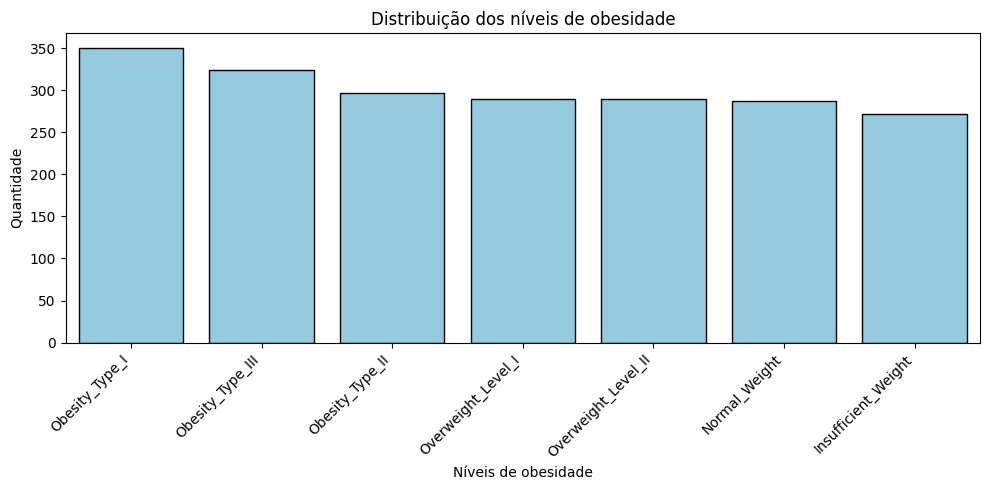

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [57]:
# distribuição dos niveis de obesidade com valores nas barras
obesity_counts = data['NObeyesdad'].value_counts()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=obesity_counts.index, y=obesity_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribuição dos níveis de obesidade')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Níveis de obesidade')
plt.ylabel('Quantidade')

plt.tight_layout()
plt.show()

print(obesity_counts)

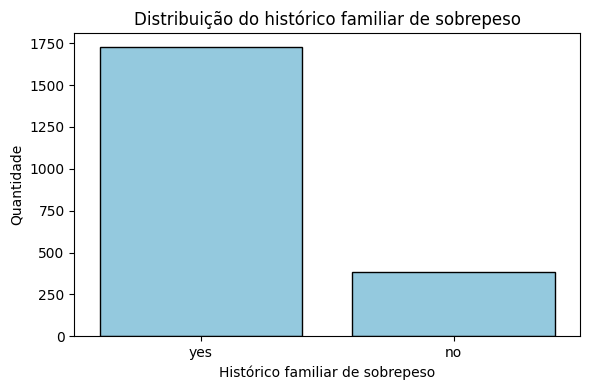

In [58]:
#distribuição de historico familiar de sobrepeso

family_history_counts = data['family_history_with_overweight'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=family_history_counts.index, y=family_history_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribuição do histórico familiar de sobrepeso')
plt.xlabel('Histórico familiar de sobrepeso')
plt.ylabel('Quantidade')

plt.tight_layout()
plt.show()

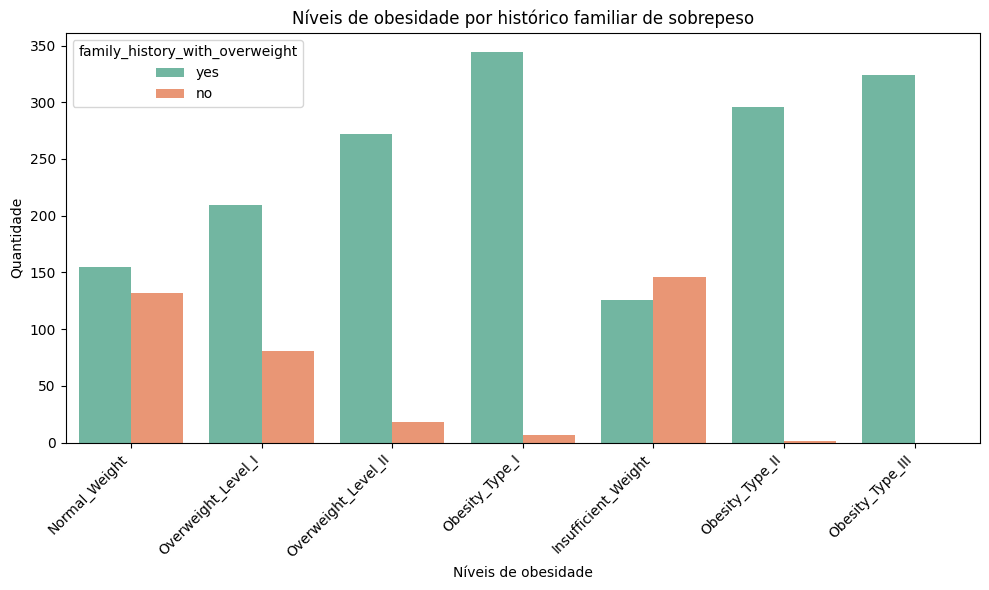

In [59]:
#distruição dos niveis de obesidade com o histórico familiar de sobrepeso

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='NObeyesdad', hue='family_history_with_overweight', palette='Set2')
plt.title('Níveis de obesidade por histórico familiar de sobrepeso')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Níveis de obesidade')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

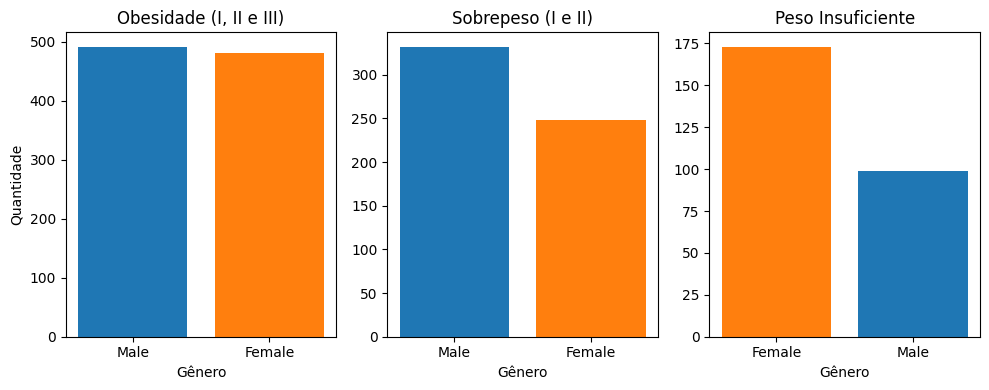

In [60]:
#Distribuição de obesidade, sobrepeso e subnutrição por gênero

obesity = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
overweight = ['Overweight_Level_I', 'Overweight_Level_II']
underweight = ['Insufficient_Weight']

obesity_counts = data[data['NObeyesdad'].isin(obesity)]['Gender'].value_counts()
overweight_counts = data[data['NObeyesdad'].isin(overweight)]['Gender'].value_counts()
underweight_counts = data[data['NObeyesdad'].isin(underweight)]['Gender'].value_counts()

#plot
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].bar(obesity_counts.index, obesity_counts.values,
            color=['#1f77b4' if g == 'Male' else '#ff7f0e' for g in obesity_counts.index])
axes[0].set_title("Obesidade (I, II e III)")
axes[0].set_xlabel("Gênero")
axes[0].set_ylabel("Quantidade")

axes[1].bar(overweight_counts.index, overweight_counts.values,
            color=['#1f77b4' if g == 'Male' else '#ff7f0e' for g in overweight_counts.index])
axes[1].set_title("Sobrepeso (I e II)")
axes[1].set_xlabel("Gênero")

axes[2].bar(underweight_counts.index, underweight_counts.values,
            color=['#1f77b4' if g == 'Male' else '#ff7f0e' for g in underweight_counts.index])
axes[2].set_title("Peso Insuficiente")
axes[2].set_xlabel("Gênero")

plt.tight_layout()
plt.show()


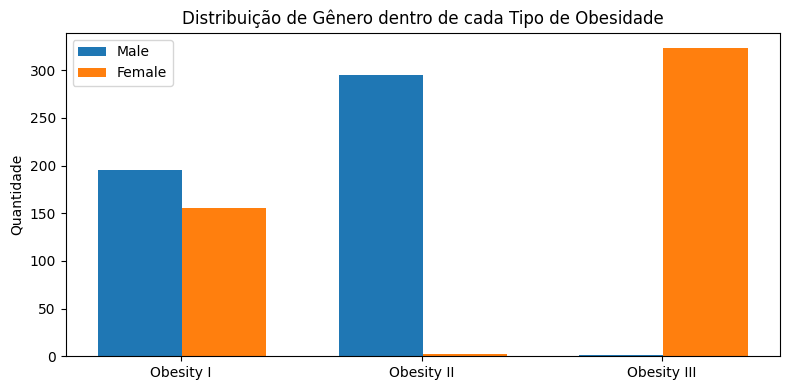

In [61]:
#analisando a distribuição de gênero por tipo de obesidade
ob1 = data[data['NObeyesdad'] == 'Obesity_Type_I']['Gender'].value_counts()
ob2 = data[data['NObeyesdad'] == 'Obesity_Type_II']['Gender'].value_counts()
ob3 = data[data['NObeyesdad'] == 'Obesity_Type_III']['Gender'].value_counts()
male = [ob1.get('Male', 0), ob2.get('Male', 0), ob3.get('Male', 0)]
female = [ob1.get('Female', 0), ob2.get('Female', 0), ob3.get('Female', 0)]

labels = ['Obesity I', 'Obesity II', 'Obesity III']
x = range(len(labels))

#plot
plt.figure(figsize=(8,4))

plt.bar(x, male, width=0.35, label='Male')
plt.bar([i + 0.35 for i in x], female, width=0.35, label='Female')

plt.xticks([i + 0.17 for i in x], labels)
plt.ylabel("Quantidade")
plt.title("Distribuição de Gênero dentro de cada Tipo de Obesidade")
plt.legend()

plt.tight_layout()
plt.show()


**Análise**  
O valor da variável *Gender* é bem equilibrado para os valores de obesidade, variando mais ao analisar o tipo: Obesidade III é composta quase exclusivamente por mulheres, Obesidade II é composta quase exclusivamente por homens, e a Obesidade I, apesar de também ser dominada pelo gênero masculino, apresenta uma disparidade de gênero bem menor. Para os valores de sobrepeso, se torna mais comum entre homens, enquanto a subnutrição é mais comum entre mulheres.

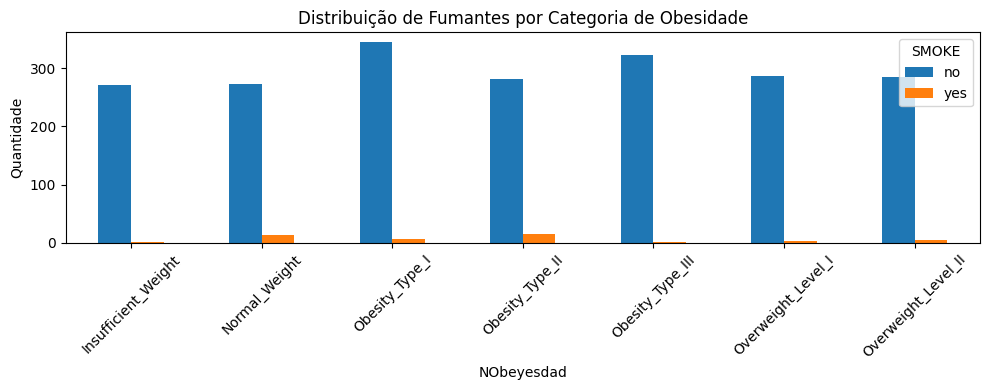

In [62]:
#dsitribuição de fumantes por valor de classe de peso
smoke_dist = pd.crosstab(data['NObeyesdad'], data['SMOKE'])

smoke_dist.plot(kind='bar', figsize=(10,4))
plt.title('Distribuição de Fumantes por Categoria de Obesidade')
plt.xlabel('NObeyesdad')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

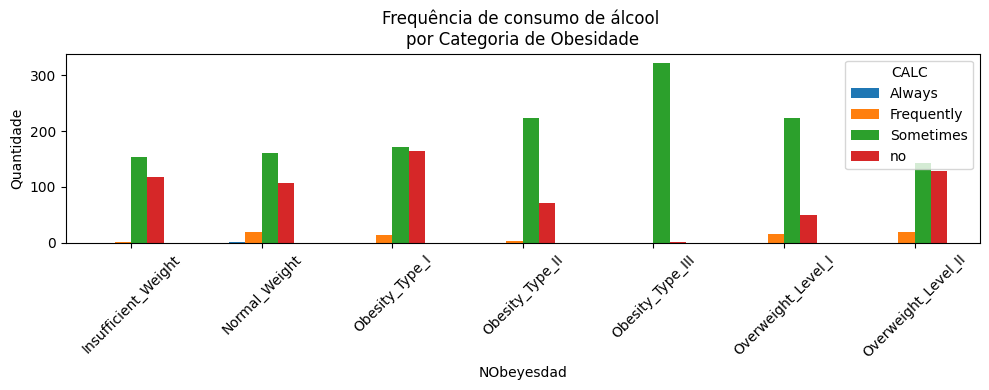

In [63]:
#distribuição de consumo de alcool por valor de classe de peso
smoke_dist = pd.crosstab(data['NObeyesdad'], data['CALC'])

smoke_dist.plot(kind='bar', figsize=(10,4))
plt.title('Frequência de consumo de álcool \npor Categoria de Obesidade')
plt.xlabel('NObeyesdad')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Análise**  
Ao analisar o consumo de drogas lícitas, é observado que, enquanto o uso de cigarro parece ser pouco relevante para determinar o peso do indivíduo, sendo predominantemente negativo para todas as classes de peso, o consumo de álcool por sua vez aparenta ser mais relevante, com os valores "Ocasionalmente" e "Não consumo" sendo mais equilibrados, e, conforme as classes avançam para o grau mais avançado de obesidade, a resposta "Ocasionalmente" se torna mais frequente e predominante.

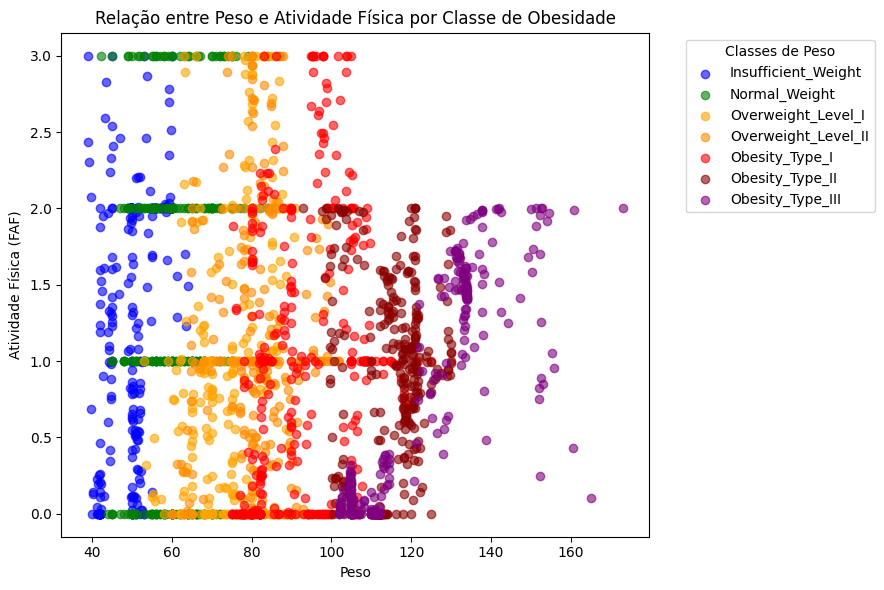

In [64]:
#distribuição peso x atividade física x classe de peso
colors = {
    'Insufficient_Weight': 'blue',
    'Normal_Weight': 'green',
    'Overweight_Level_I': 'orange',
    'Overweight_Level_II': 'darkorange',
    'Obesity_Type_I': 'red',
    'Obesity_Type_II': 'darkred',
    'Obesity_Type_III': 'purple'
}

#plot
plt.figure(figsize=(9,6))

for classe, cor in colors.items():
    subset = data[data['NObeyesdad'] == classe]
    plt.scatter(subset['Weight'], subset['FAF'], color=cor, alpha=0.6, label=classe)

plt.xlabel("Peso")
plt.ylabel("Atividade Física (FAF)")
plt.title("Relação entre Peso e Atividade Física por Classe de Obesidade")
plt.legend(title="Classes de Peso", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


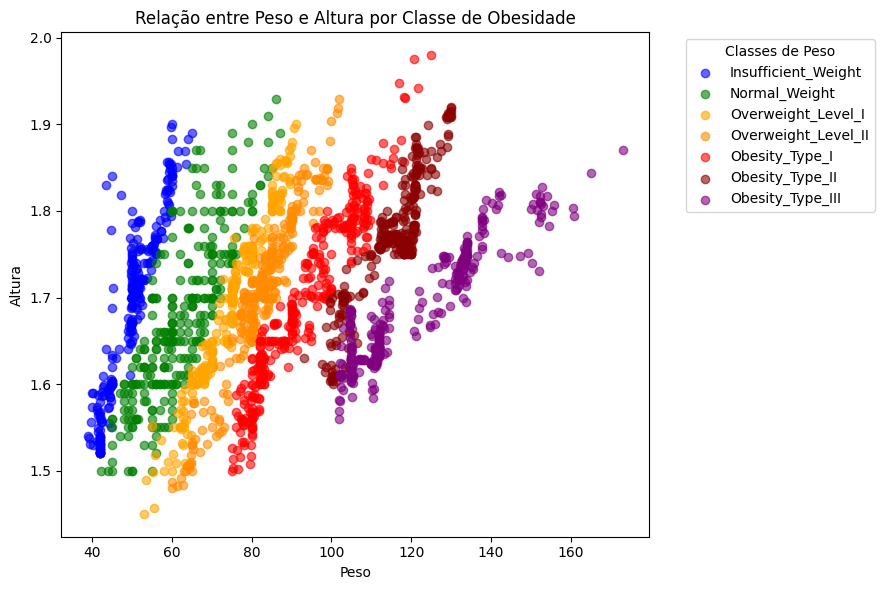

In [65]:
#distribuição peso x altura x classe de peso
plt.figure(figsize=(9,6))

for classe, cor in colors.items():
    subset = data[data['NObeyesdad'] == classe]
    plt.scatter(subset['Weight'], subset['Height'], color=cor, alpha=0.6, label=classe)

plt.xlabel("Peso")
plt.ylabel("Altura")
plt.title("Relação entre Peso e Altura por Classe de Obesidade")
plt.legend(title="Classes de Peso", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [66]:
#confirmando que os valores categóricos ordinais
#e quantitativos discretos possuem valores quebrados
ord_disc_vars = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
data[ord_disc_vars].describe()

,Age,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,3.000000,4.000000,3.000000,3.000000,2.000000


**Análise**  
Na documentação do dataset consta que essa variável deveria ter 4 valores discretos, de 0 a 3, representando o index de uma resposta. No entanto, é possível observar diversos valores entre os inteiros. Isso acontece devido a natureza do dataset ser parte sintética, usando um filtro SMOTE para gerar mais registros. Esse filtro funciona bem com valores contínuos, mas não com variáveis categóricas como *FAF*, pois gera valores interpolados sem significado. Como não é possível reverter o SMOTE, e excluir os registros sintéticos diminuiria drasticamente a quantidade de dados, o idel seria arredondar os valores para o inteiro mais próximo.  
Ademais, é possível observar que a classe *Weight* sozinha não pode ser determinante para definir a classe de peso, pois, para um mesmo peso, a classe pode variar, a depender, por exemplo, do nível de atividade física ou da altura do indivíduo.

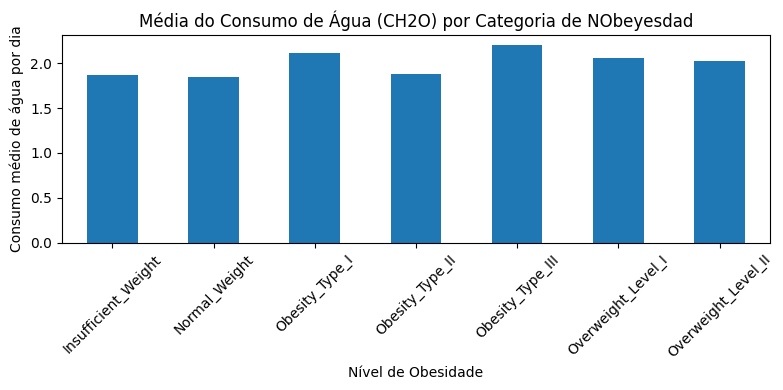

In [67]:
#distribuição da quantidade média de consumo diário de água por valor de classe de peso
mean_ch2o = data.groupby('NObeyesdad')['CH2O'].mean()

plt.figure(figsize=(8,4))
mean_ch2o.plot(kind='bar')
plt.title('Média do Consumo de Água (CH2O) por Categoria de NObeyesdad')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Consumo médio de água por dia')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Análise**  
O consumo de água parece pouco relevante para identificar a classe de pesso, sendo relativamente balanceado entre as classes.

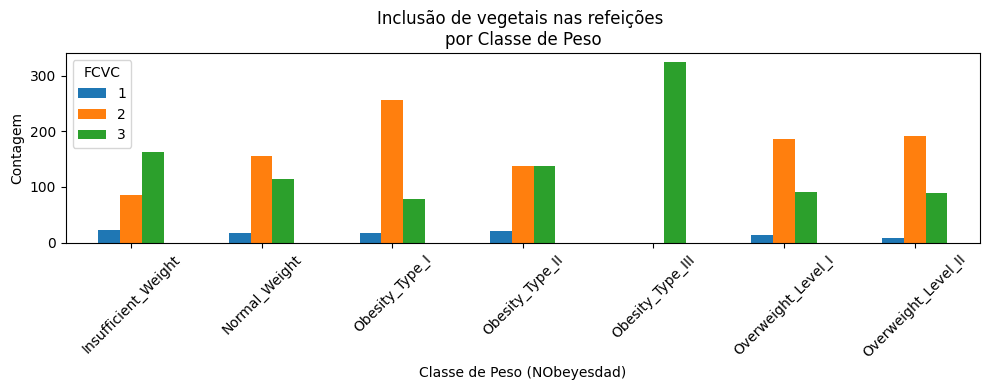

In [77]:
#distribuição da inclusão de vegetais por classe de peso
#EXECUTAR NOVAMENTE APÓS O TRATAMENTO DOS DADOS PARA CORRETA VISUALIZAÇÃO
fcvc_counts = pd.crosstab(data['NObeyesdad'], data['FCVC'])

fcvc_counts.plot(kind='bar', figsize=(10,4))
plt.title("Inclusão de vegetais nas refeições \npor Classe de Peso")
plt.xlabel("Classe de Peso (NObeyesdad)")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.legend(title="FCVC")

plt.tight_layout()
plt.show()



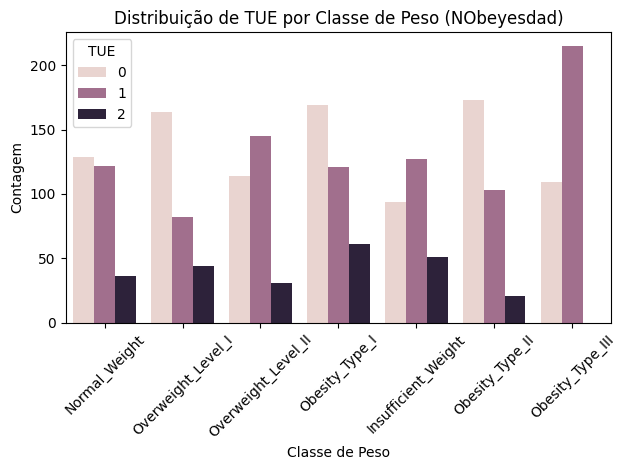

In [79]:
#uso de tecnologia por classe de peso
#EXECUTAR NOVAMENTE APÓS O TRATAMENTO DOS DADOS PARA CORRETA VISUALIZAÇÃO
sns.countplot(data=data, x="NObeyesdad", hue="TUE")

plt.title("Distribuição de TUE por Classe de Peso (NObeyesdad)")
plt.xlabel("Classe de Peso")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.legend(title="TUE")

plt.tight_layout()
plt.show()

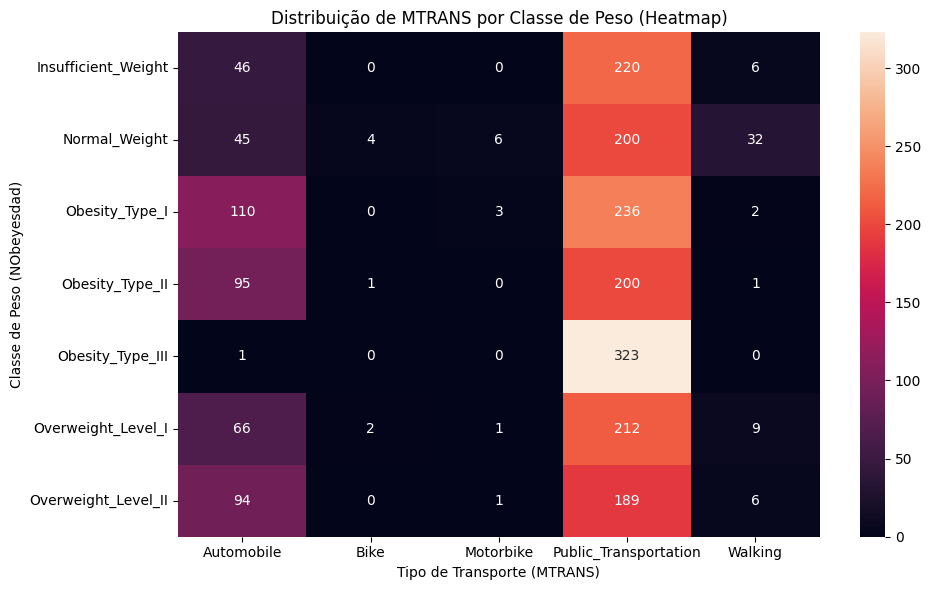

In [70]:
#tipo de transporte por classe de peso
cross = pd.crosstab(data['NObeyesdad'], data['MTRANS'])

plt.figure(figsize=(10,6))

sns.heatmap(cross, annot=True, fmt="d")

plt.title("Distribuição de MTRANS por Classe de Peso (Heatmap)")
plt.xlabel("Tipo de Transporte (MTRANS)")
plt.ylabel("Classe de Peso (NObeyesdad)")

plt.tight_layout()
plt.show()

**Análise**  
A variável *TUE* se concentra em apenas dois valores, para todas as classes de peso, fornecendo pouca relevância.

# 2. Preparação dos dados

*   Colunas com pouca relevância serão removidas
*   Variáveis categóricas ordinais ou quantitativas discretas serão arredondadas
*   Variáveis binárias serão codificadas para 0 e 1
*   Variáveis categóricas ordinais que estão em string serão codificadas



| Variável codificada | Mapeamento |
| :--- | :---: |
| Gender | Male = 0 // Female = 1 |
| family_history_with_overweight | no = 0 // yes = 1 |
| FAVC | no = 0 // yes = 1 |
| SCC | no = 0 // yes = 1 |
| CAEC | no = 0 // Sometimes = 1 // Frequently = 2 // Always = 3 |
| CALC | no = 0 // Sometimes = 1 // Frequently = 2 // Always = 3 |

In [71]:
#arredondando valores prejudicados pelo SMOTE
for var in ord_disc_vars:
    data[var] = data[var].round().astype(int)

In [72]:
#retirando colunas com pouca relevância
low_relevance_var = ['SMOKE', 'CH2O', 'MTRANS']
data.drop(low_relevance_var, axis=1, inplace=True)

In [73]:
#substituindo binárias yes/no
yes_no_vars = ['family_history_with_overweight', 'FAVC', 'SCC']
data[yes_no_vars] = data[yes_no_vars].replace({'yes': 1, 'no': 0})

#substituindo binária de gênero
data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})

/tmp/ipython-input-3343928566.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[yes_no_vars] = data[yes_no_vars].replace({'yes': 1, 'no': 0})
/tmp/ipython-input-3343928566.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})


In [74]:
ordinal_time_vars = ['CAEC', 'CALC']
ordinal_map = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

data['CAEC'] = data['CAEC'].map(ordinal_map)
data['CALC'] = data['CALC'].map(ordinal_map)


In [75]:
data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SCC,FAF,TUE,CALC,NObeyesdad
0,1,21,1.62,64.0,1,0,2,3,1,0,0,1,0,Normal_Weight
1,1,21,1.52,56.0,1,0,3,3,1,1,3,0,1,Normal_Weight
2,0,23,1.80,77.0,1,0,2,3,1,0,2,1,2,Normal_Weight
3,0,27,1.80,87.0,0,0,3,3,1,0,2,0,2,Overweight_Level_I
4,0,22,1.78,89.8,0,0,2,1,1,0,0,0,1,Overweight_Level_II
5,0,29,1.62,53.0,0,1,2,3,1,0,0,0,1,Normal_Weight
6,1,23,1.50,55.0,1,1,3,3,1,0,1,0,1,Normal_Weight
7,0,22,1.64,53.0,0,0,2,3,1,0,3,0,1,Normal_Weight
8,0,24,1.78,64.0,1,1,3,3,1,0,1,1,2,Normal_Weight
9,0,22,1.72,68.0,1,1,2,3,1,0,1,1,0,Normal_Weight


# 3. Determinação da tarefa de Aprendizado de Máquina

# 4. Determinação da abordagem de validação cruzada

Justificativa que corrobore com a situação:

## 4.1. Determinação das Métricas de desempenho

Justificativa que corrobore com a situação:

# 5. Elaboração da Grade de busca

Justificativa

## 5.1. Definição dos Parâmetros

Justificativa

## 5.2. Definição dos Hiperparâmetros

Justificativa

# 6. Treinamento dos modelos

## 6.1. Testando os modelos

# 7. Análise de desempenho dos modelos

## 7.1. Análise Quantitativa

## 7.2. Análise Qualitativa